# K- Means Clustering

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## Loading the dataset 

In [205]:
df = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [206]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


- Here the *ID#* feature is of no use, so we will drop it

In [207]:
df.drop('ID#', axis= 1, inplace= True)

In [208]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [209]:
df.shape

(3999, 11)

## Scaling the data set

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
scaler = StandardScaler()

In [212]:
data = scaler.fit_transform(df)

In [213]:
df = pd.DataFrame(data=data,columns= df.columns)

In [214]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


## Feature scaling

In [215]:
from sklearn.decomposition import PCA

In [216]:
pca = PCA(n_components=3)

In [217]:
pca

PCA(n_components=3)

In [218]:
pca_scaled = pca.fit_transform(df)

In [219]:
pca_scaled

array([[-1.46667427, -0.06718286, -0.80288006],
       [-1.4505642 , -0.06374317, -0.75202066],
       [-1.2100507 , -0.13355511, -0.76493683],
       ...,
       [ 0.17353576, -0.61180929,  0.40847963],
       [-1.69524058,  0.72653107,  0.43867994],
       [-2.10886559,  0.40309321,  0.50768892]])

In [220]:
pca.feature_names_in_

array(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo',
       'Flight_trans_12', 'Days_since_enroll', 'Award?'], dtype=object)

In [221]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2'], dtype=object)

In [222]:
df = pd.DataFrame(data=pca_scaled,columns= pca.get_feature_names_out())

In [223]:
df

,pca0,pca1,pca2
0,-1.466674,-0.067183,-0.802880
1,-1.450564,-0.063743,-0.752021
2,-1.210051,-0.133555,-0.764937
3,-1.507201,-0.061529,-0.754456
4,3.006984,-0.185534,-0.241241
...,...,...,...
3994,-0.955029,0.460020,0.385827
3995,-1.032571,0.301103,0.211921
3996,0.173536,-0.611809,0.408480
3997,-1.695241,0.726531,0.438680


## Identify the value of K

In [224]:
from sklearn.cluster import KMeans

In [225]:
wcss = []
for k in range(1,51):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

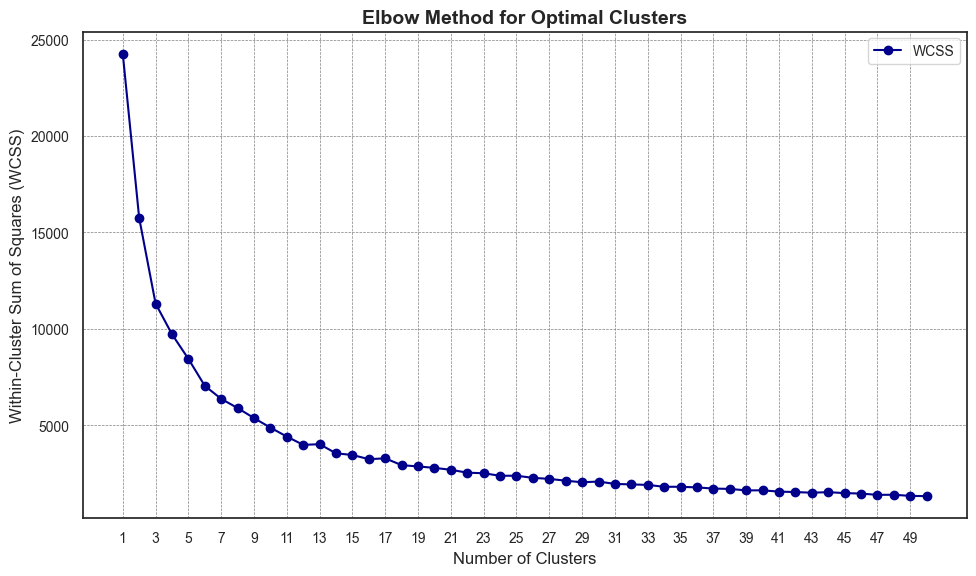

In [226]:
# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(wcss) + 1), wcss, marker='o', linestyle='-', color='darkblue', label='WCSS')

# Adding titles and labels
plt.title("Elbow Method for Optimal Clusters", fontsize=14, fontweight='bold')
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Within-Cluster Sum of Squares (WCSS)", fontsize=12)

# Customizing ticks and grid
plt.xticks(range(1, len(wcss) + 1, 2), fontsize=10)
plt.yticks(fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Adding a legend
plt.legend(loc='upper right', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

- After 10 it is kind of normalizing

## Automated way

In [227]:
from kneed import KneeLocator

In [228]:
kl = KneeLocator(range(1,51),wcss,curve='convex',direction='decreasing')

In [229]:
kl.elbow

np.int64(10)

### So we will train our model to divide the data into 10 clusters

In [230]:
model = KMeans(n_clusters= 10, init='k-means++')

In [231]:
model.fit(df)

KMeans(n_clusters=10)

In [232]:
pred_clusters = model.predict(df)

In [233]:
pred_clusters

array([4, 4, 4, ..., 7, 2, 2], dtype=int32)

In [234]:
df['Cluster'] = pred_clusters

In [235]:
df.head()

,pca0,pca1,pca2,Cluster
0,-1.466674,-0.067183,-0.802880,4
1,-1.450564,-0.063743,-0.752021,4
2,-1.210051,-0.133555,-0.764937,4
3,-1.507201,-0.061529,-0.754456,4
4,3.006984,-0.185534,-0.241241,6


In [236]:
df

,pca0,pca1,pca2,Cluster
0,-1.466674,-0.067183,-0.802880,4
1,-1.450564,-0.063743,-0.752021,4
2,-1.210051,-0.133555,-0.764937,4
3,-1.507201,-0.061529,-0.754456,4
4,3.006984,-0.185534,-0.241241,6
...,...,...,...,...
3994,-0.955029,0.460020,0.385827,2
3995,-1.032571,0.301103,0.211921,2
3996,0.173536,-0.611809,0.408480,7
3997,-1.695241,0.726531,0.438680,2


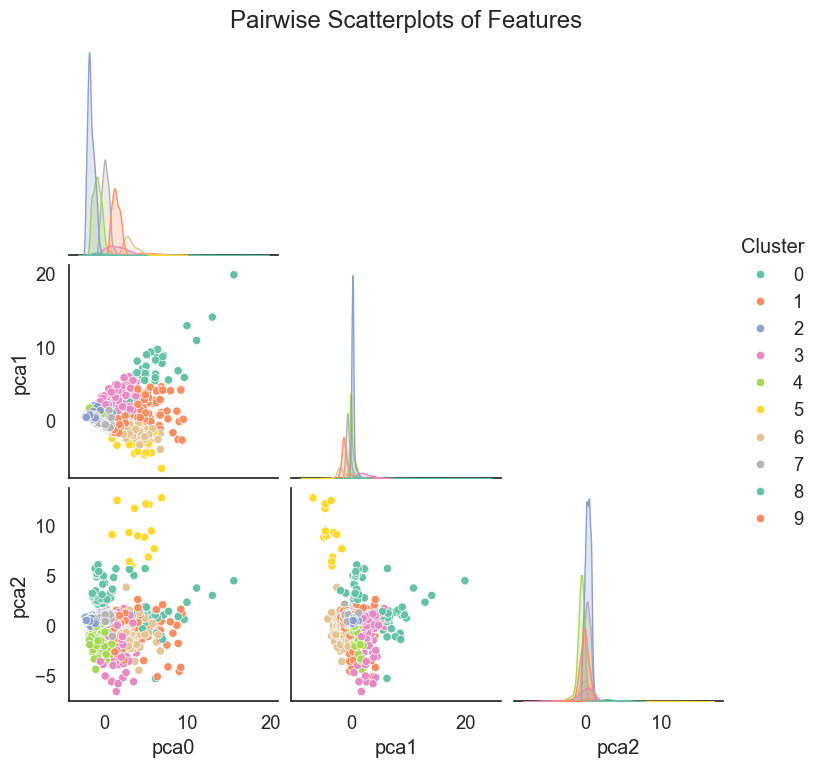

In [237]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Cluster', palette='Set2', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Scatterplots of Features', y=1.02)
plt.show()

## **K-Means Clustering Analysis**
- **Clusters**: K-Means identified **10 clusters** (labeled 0 to 9).
- **Distribution**:
   - The clusters are **well-separated** in some areas but still have some overlap.
   - Clusters appear **compact** and spherical, which is expected because K-Means assumes clusters are globular.
- **Observations**:
   - Some clusters (e.g., yellow at the top and green clusters) are more **spread out** than others.
   - Most data points are concentrated in the lower regions of `pca1` and `pca2` (indicating dense clusters).
   - K-Means is sensitive to initialization and distance-based grouping, which explains the even splitting of the clusters.
- **Insights**:
   - K-Means works well when the data is dense and clusters are relatively spherical.
   - It fails to handle outliers effectively, as outliers are still grouped into nearby clusters.
   - The clustering might not represent **arbitrary shapes** in the data.

---

## Evaluation

In [239]:
from sklearn.metrics import silhouette_score

In [240]:
silhouette_score(df,pred_clusters)

np.float64(0.6313327337213994)